# EXPLORATORY DATA ANALYSIS : ZOMATO(HYDERABAD'S LATEST WEEK) 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomatocsv/HyderabadResturants.csv


In [2]:
import matplotlib.pyplot as mat
import seaborn as sbn
sbn.set_style=('darkgrid')

In [3]:
data= pd.read_csv('../input/zomatocsv/HyderabadResturants.csv')

In [4]:
data

,links,names,ratings,cuisine,price for one
0,https://www.zomato.com/hyderabad/sahara-bakers...,Sahara Bakers,3.7,"Chinese, Bakery, Sichuan, Pizza, Burger",100
1,https://www.zomato.com/hyderabad/kfc-abids/order,KFC,3.9,"Burger, Fast Food, Biryani, Desserts, Beverages",100
2,https://www.zomato.com/hyderabad/subbaiah-gari...,Subbaiah Gari Hotel,4.1,"South Indian, Andhra, Mithai",100
3,https://www.zomato.com/hyderabad/paradise-biry...,Paradise Biryani,3.9,"Biryani, Kebab, Desserts, Beverages",100
4,https://www.zomato.com/hyderabad/pista-house-b...,Pista House Bakery,4.3,"Fast Food, Sandwich, Pizza, Burger, Wraps, Rol...",100
...,...,...,...,...,...
652,https://www.zomato.com/hyderabad/dr-cakes-banj...,Dr Cakes,3.2,"Bakery, Desserts",350
653,https://www.zomato.com/hyderabad/shahi-naan-am...,Shahi Naan,-,North Indian,350
654,https://www.zomato.com/hyderabad/combosthalam-...,Combosthalam By Phulkaas,3.8,"North Indian, Chinese",350
655,https://www.zomato.com/hyderabad/pachadis-by-p...,Pachadis By Phulkaas,-,South Indian,350


In [5]:
data.columns

Index(['links', 'names', 'ratings', 'cuisine', 'price for one'], dtype='object')

In [6]:
#dealing with null data
data.isnull().sum()

links            0
names            0
ratings          0
cuisine          0
price for one    0
dtype: int64

In [7]:
# it seems there is no null data 

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 657 entries, 0 to 656
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   links          657 non-null    object
 1   names          657 non-null    object
 2   ratings        657 non-null    object
 3   cuisine        657 non-null    object
 4   price for one  657 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 25.8+ KB


# __RESTAURANTS__

In [9]:
res=data.names.value_counts()

Text(0.5, 1.0, "HYDERABAD'S BUSY RESTAURANTS")

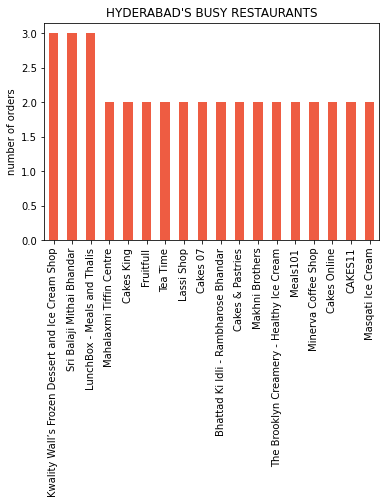

In [10]:
res[res.isin([3,2])].plot(kind='bar', color='#ee5c42')
mat.ylabel('number of orders')
mat.rcParams["figure.figsize"]=(14,7)
mat.title("HYDERABAD'S BUSY RESTAURANTS")

### __MAXIMUM NUMBER OF ORDERS WAS PLACED FROM ABOVE RESTRAUENTS__ 

# __RATINGS__

In [11]:
#converting the object type of ratings
data['ratings']=pd.to_numeric(data.ratings, errors='coerce')

In [12]:
rating=data[data.ratings>4.0][['names','price for one','ratings']]

In [13]:
ratein=rating.sort_values(by='ratings', ascending = False)
ratein

,names,price for one,ratings
450,Sri Krishna Sweets,100,4.7
496,US Live Pops,150,4.6
184,Euphoria,350,4.6
72,Almond House,350,4.6
611,Mimee's Chocolates,150,4.6
...,...,...,...
258,Madina Tiffins,150,4.1
232,Ravi Tiffins,150,4.1
229,Sri Siddartha Pure Veg,150,4.1
225,The Exotic Shawarma,150,4.1


In [14]:
ratein.names.head(10)

450                                  Sri Krishna Sweets
496                                        US Live Pops
184                                            Euphoria
72                                         Almond House
611                                  Mimee's Chocolates
173                                 Emerald Mithai Shop
300                                Hameedi Confectioner
559                            Sri Shagun Mithai Vatika
214                                       Madhur Sweets
53     Kwality Wall’s Frozen Dessert and Ice Cream Shop
Name: names, dtype: object

   ## __TOP RATED RESTAURANTS__
   __Sri Krishna Sweets__,
   
   __US Live Pops,Euphoria,__
   
   __Almond House,__
   
   __Mimee's Chocolates,__
   
   __Hameedi Confectione,__
   
   __Sri Shagun Mithai Vatika__
   
   ,__Madhur Sweet,__
   
   __Kwality Wall’s Frozen Dessert__
   
   __and Ice Cream Shop__

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


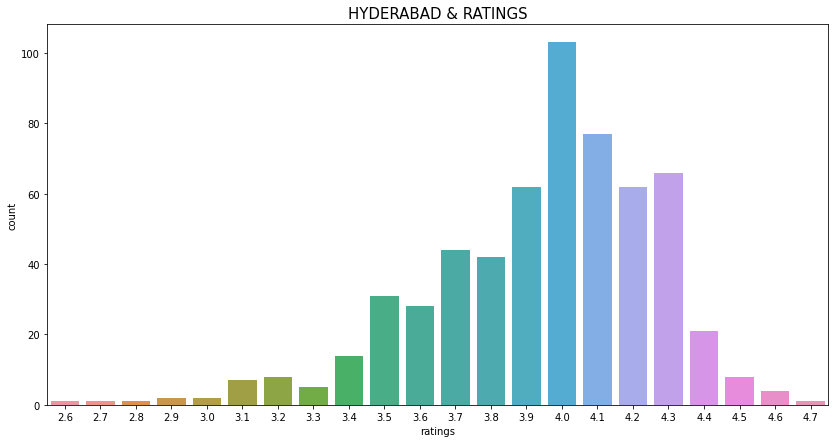

In [15]:
sbn.countplot(data['ratings']);
mat.title("HYDERABAD & RATINGS", fontsize=15);

### __IT SEEMS THAT MAXIUM NUMBER OF  RATINGS  ARE BETWEEN 4.1 AND 4.3 IN HYDERABAD REGION__

# TOP FOODS

Text(0, 0.5, 'number of orders')

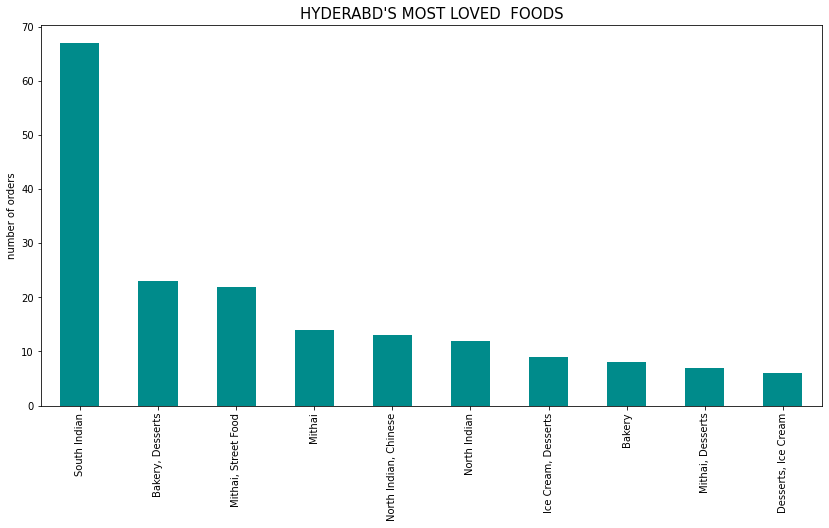

In [16]:
data.cuisine.value_counts().head(10).plot(kind="bar", color='#008b8b')
mat.title("HYDERABD'S MOST LOVED  FOODS", fontsize='15')
mat.ylabel("number of orders")

### __Hyderaba's people loves south Indian cuisine's__

# PRICE RANGE

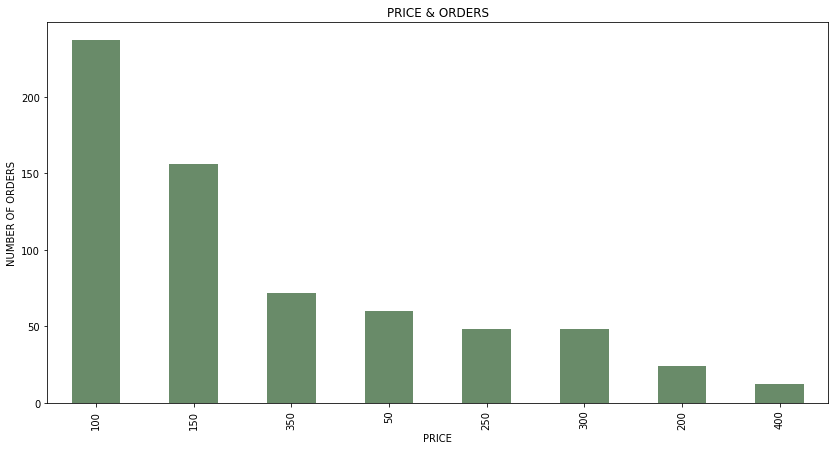

In [17]:
data.groupby('price for one')['cuisine'].count().sort_values(ascending=False).plot(kind='bar', color='#698b69')
mat.xlabel('PRICE')
mat.ylabel('NUMBER OF ORDERS')
mat.title('PRICE & ORDERS');

### __HIGHLY ORDERED FOODS ARE  OF PRICE RANGE 100 to 150  __

Text(0.5, 1.0, 'THE PRICE AND RATINGS')

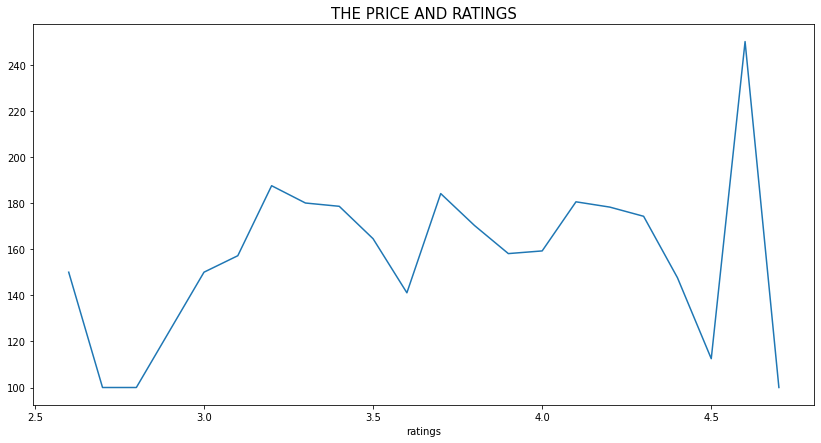

In [18]:
data.groupby('ratings')['price for one'].mean().plot()
mat.title('THE PRICE AND RATINGS', fontsize=15)

__ABOVE IS THE TREND BETWEEN RATINGS AND PRICES, IT SHOWS FOODS WITH LOW COST ARE LESS RATED__

__REASONS: BAD FOOD QUALITY__


__SOLUTION: CONCENTRATING ON LOW COST FOODS AND IT QUALITY HELPS IN BOOSTING UP THE RATING__

### __THE MORE PEOPLE LOVE THE MORE PEOPLE RATE__


__